In [1]:
import numpy as np

from qiskit import QuantumCircuit, pulse, circuit, transpile, assemble, schedule
from qiskit.extensions import HamiltonianGate
from qiskit.pulse.library import GaussianSquare
from qiskit.providers.fake_provider import FakeAthens, FakeBoeblingen, FakeOpenPulse2Q, FakeBoeblingenV2, FakeAthens
# from hal_params import init_static_ham

In [2]:
# backend = FakeBoeblingen()
backend = FakeAthens()
default = backend.defaults()

dt = backend.configuration().dt

# backend.configuration().to_dict()

In [3]:
from IPython import display
from IPython.core.display import HTML
print(HTML(backend.configuration().hamiltonian["h_latex"]))

<IPython.core.display.HTML object>


Important fact check:
    drive frequency of the control channel qubit 0 is already set to the eigenfrequency of the qubit 1.

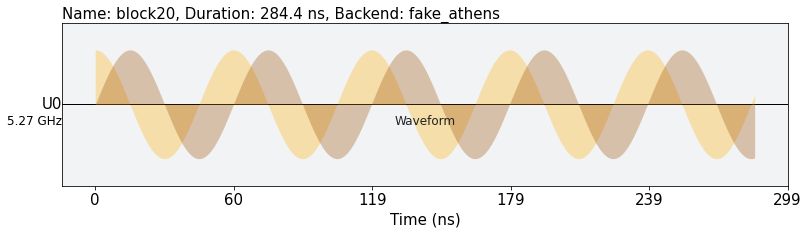

In [35]:
with pulse.build(backend=backend) as pulseschedule:
    uchan = pulse.control_channels(0,1)[0]
    pulse.play(np.exp(1j*0.3*np.linspace(0, 100, 16*80)), uchan)
pulseschedule.draw(backend=backend)

In [13]:
pulseschedule

ScheduleBlock(Play(Waveform(array([1.        +0.j        , 0.99972492+0.02345367j,
       0.99889985+0.04689445j, ..., 0.10774856-0.99417818j,
       0.13103605-0.9913776j , 0.15425145-0.98803162j])), ControlChannel(0)), name="block5", transform=AlignLeft())

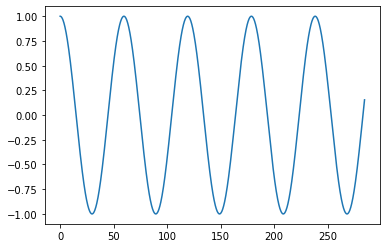

In [20]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0,16*80*dt*1e9, 16*80), np.real(np.exp(1j*0.3*np.linspace(0, 100, 16*80))))

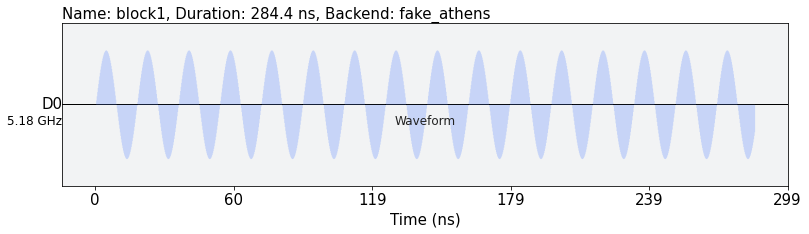

In [6]:
with pulse.build(backend=backend) as pulseschedule:
    uchan = pulse.DriveChannel(0)
    pulse.play(np.sin(np.linspace(0,100,16*80)), uchan)
pulseschedule.draw(backend=backend)

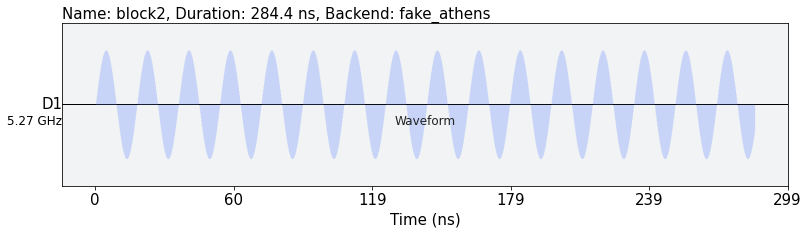

In [7]:
with pulse.build(backend=backend) as pulseschedule:
    uchan = pulse.DriveChannel(1)
    pulse.play(np.sin(np.linspace(0,100,16*80)), uchan)
pulseschedule.draw(backend=backend)

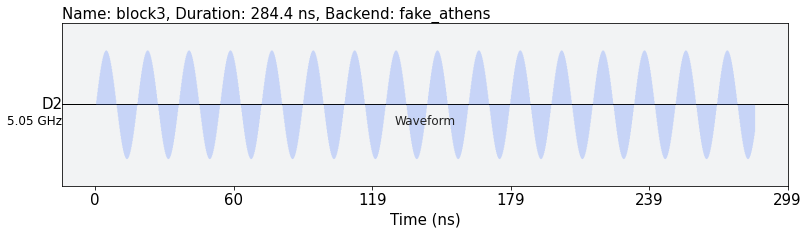

In [8]:
with pulse.build(backend=backend) as pulseschedule:
    uchan = pulse.DriveChannel(2)
    pulse.play(np.sin(np.linspace(0,100,16*80)), uchan)
pulseschedule.draw(backend=backend)